#Assignment 07_Clustering_Q2_AirlineData

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 


In [4]:
airline = pd.read_csv("/content/Copy of EastWestAirlines.csv")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airline.shape

(3999, 12)

In [7]:
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
airline[airline.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


#Using Normalization function

In [9]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
df_norm = norm_func(airline.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


#Hierarchical Clustering Dendrogram
singal linkage

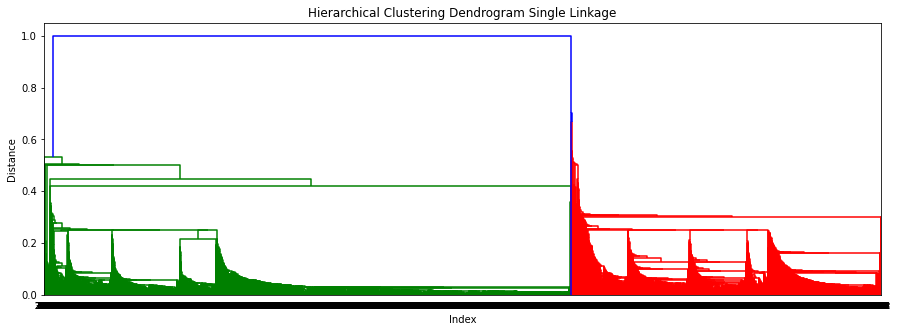

In [11]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram Single Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.  # font size for the x axis labels
)
plt.show()

#Create Cluster using Agglomerative Clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering 
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
# Affinity -> type of clustering used (Euclidean)
# single linkage is used
# n_clusters=4 -> Will make 4 cuts

In [13]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
Clusters.head()# Column( record, Cluster number)

,Clusters
0,1
1,1
2,1
3,1
4,0


In [15]:
df_norm['h_clusterid']= Clusters #Storing it in df_norm
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0


#Sorting Values of cluster in Ascending Form

In [16]:
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.0,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1513,0.073189,0.152853,0.00,0.0,0.0,0.043855,0.093023,0.022715,0.037736,0.584157,1.0,0
1512,0.002803,0.000000,0.00,0.0,0.0,0.002275,0.023256,0.000000,0.000000,0.593682,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.0,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
3167,0.010478,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.244273,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1769,0.039659,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.535327,0.0,1
1756,0.036975,0.000000,0.25,0.0,0.0,0.034154,0.162791,0.000000,0.000000,0.539306,0.0,1
3998,0.001769,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.168314,0.0,1
3583,0.093917,0.044851,0.00,0.0,0.0,0.272879,1.000000,1.000000,1.000000,0.165300,1.0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


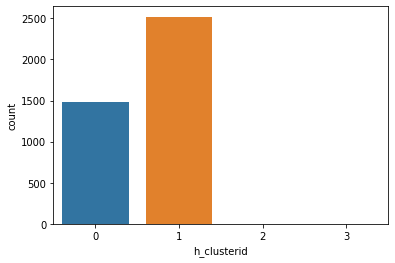

In [17]:
import seaborn as sns
sns.countplot(df_norm["h_clusterid"])

In [18]:
import sklearn.metrics as sm
y_hc = hc.fit_predict(df_norm)
sm.accuracy_score(y_hc,Clusters)

1.0

#K-means

In [19]:
from sklearn.cluster import KMeans
import pandas as pd
airline2= pd.read_csv("/content/Copy of EastWestAirlines.csv")
airline2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [22]:
airline2 = (airline2.iloc[:,1:])
airline2.head()

,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,1,1,174,1,0,0,7000,0
1,1,1,1,215,2,0,0,6968,0
2,1,1,1,4123,4,0,0,7034,0
3,1,1,1,500,1,0,0,6952,0
4,4,1,1,43300,26,2077,4,6935,1


#Using StandardScalar Function

In [23]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline = pd.DataFrame(scaler.fit_transform(airline2.iloc[:,1:]))
scaled_airline.head()

,0,1,2,3,4,5,6,7
0,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [24]:
airline2.corr()

,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cc1_miles,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121
Award?,0.335457,0.005332,0.023484,0.373506,0.333893,0.217715,0.247909,0.188121,1.000000


#Elbow Plot / Screw Plot




In [25]:
k = list(range(1,11))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [26]:
from scipy.spatial.distance import cdist 

TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    clf = KMeans(n_clusters = i)
    clf.fit(scaled_airline)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(scaled_airline.iloc[clf.labels_==j,:],clf.cluster_centers_[j].reshape(1,scaled_airline.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x7fa176104ed0>,
 <a list of 10 Text major ticklabel objects>)

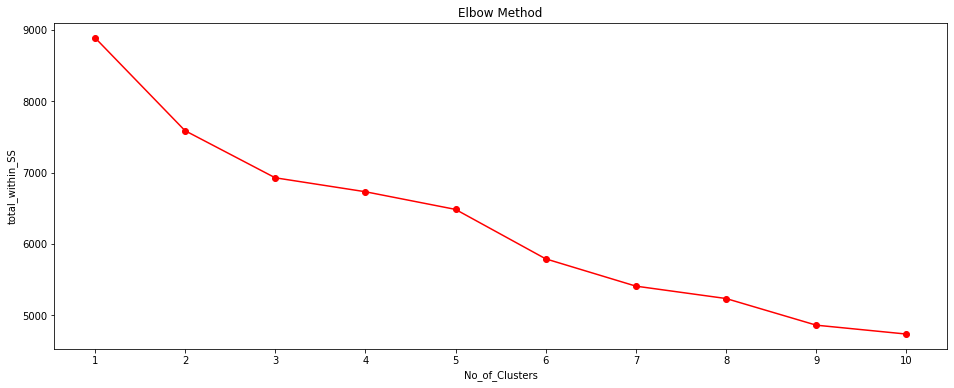

In [27]:
#Plotting
import matplotlib.pylab as plt 
plt.figure(figsize=(16,6))
plt.title('Elbow Method')
plt.plot(k,TWSS,'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(k)

In [28]:
# Selecting 6 clusters from the above elbow plot which is the optimum number of clusters 
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(scaled_airline)

KMeans(n_clusters=6, random_state=42)

In [29]:
clusters_new.labels_ # getting the labels of clusters assigned to each row

array([0, 0, 0, ..., 1, 4, 4], dtype=int32)

In [30]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.09824189, -0.05831608, -0.12750156, -0.05716187, -0.19941874,
        -0.21945457,  0.73866342, -0.7669193 ],
       [-0.09824189, -0.05875835,  0.47197482,  0.33692354, -0.0413109 ,
        -0.03351559,  0.28525586,  1.28447368],
       [-0.09824189, 15.64629931,  3.17969131,  1.71461374,  0.03329269,
         0.05969539,  0.23987261,  0.33752735],
       [ 9.03825361, -0.06276658, -0.10166533,  0.61785114,  0.0875494 ,
         0.22034681, -0.07246398,  0.05178388],
       [-0.09824189, -0.05896084, -0.47689072, -0.52457246, -0.22762132,
        -0.25031612, -0.93735253, -0.6792241 ],
       [-0.09824189, -0.06276658,  0.85627484,  1.74092018,  3.52072642,
         3.74686925,  0.27973361,  0.89224565]])

In [31]:
#beginning of  the cluster numbering with 1 instead of 0
clusters_new.labels_=clusters_new.labels_+1
clusters_new.labels_

array([1, 1, 1, ..., 2, 5, 5], dtype=int32)

In [32]:
#Assign clusters to the data set 
airline2['clusterid_new'] = clusters_new.labels_
airline2.head()

,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,1,1,174,1,0,0,7000,0,1
1,1,1,1,215,2,0,0,6968,0,1
2,1,1,1,4123,4,0,0,7034,0,1
3,1,1,1,500,1,0,0,6952,0,1
4,4,1,1,43300,26,2077,4,6935,1,2


#Using groupby() function

In [33]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(airline2.groupby('clusterid_new').mean(),2))
kmeans_mean_cluster

,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid_new,,,,,,,,,
1,2.06,1.00,1.00,14048.14,11.05,181.02,0.54,5646.01,0.00
2,2.77,1.00,1.00,28542.07,14.84,402.22,1.25,4707.58,0.99
3,3.47,1.00,4.07,93927.87,28.07,506.67,1.60,4613.87,0.53
4,1.14,2.35,1.00,14689.84,17.53,582.63,2.21,3968.93,0.40
5,1.35,1.00,1.00,5650.38,6.57,141.27,0.42,2183.73,0.04
6,2.44,1.00,1.00,37822.13,28.32,5389.19,15.58,4696.17,0.80


#DBSCAN

In [34]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("/content/Copy of EastWestAirlines.csv");
print(df.head())

   ID#  Balance  Qual_miles  ...  Flight_trans_12  Days_since_enroll  Award?
0    1    28143           0  ...                0               7000       0
1    2    19244           0  ...                0               6968       0
2    3    41354           0  ...                0               7034       0
3    4    14776           0  ...                0               6952       0
4    5    97752           0  ...                4               6935       1

[5 rows x 12 columns]


In [37]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [39]:
df.drop(['ID#'],axis=1,inplace=True) #dropping Unnamed 
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [40]:
# Store in array
array=df.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [41]:
stscaler = StandardScaler().fit(array) #standardize 
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [42]:
dbscan = DBSCAN(eps=2, min_samples=6)# DBSCAN is imported from sklearn
dbscan.fit(X)

DBSCAN(eps=2, min_samples=6)

In [43]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
# Converting labels into column named-> cluster
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [45]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [46]:
#concatenated row and col
pd.concat([df,cl],axis=1) 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [47]:
clustered=pd.concat([df,cl],axis=1)

In [48]:
clustered[clustered['cluster']== -1] #total outlier

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
50,108137,0,1,1,1,6368,5,6368,5,6844,0,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1
87,609477,0,3,1,1,21422,22,1200,8,6820,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1
3883,126167,0,5,1,1,190160,15,0,0,1612,1,-1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,-1


In [49]:
#Storing outliers Noise in c
c= clustered['cluster']== -1 

In [50]:
c.value_counts() #Total number of outliers is 193

False    3806
True      193
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


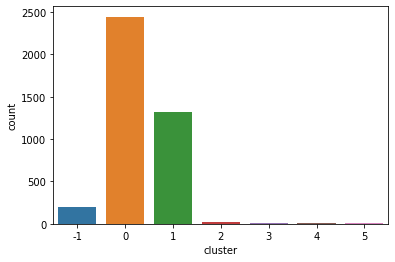

In [51]:
import seaborn as sns
sns.countplot(clustered["cluster"])

In [52]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                  0.311578
dtype: float64